In [1]:
from IPython.display import display
import pandas as pd
import math

In [2]:
def frequency_distribution(data: list, comma: int = 1):
    print(
        f"count: {len(data)}",
        f"max: {max(data)}",
        f"min: {min(data)}",
        f"range: {round(max(data)-min(data), comma)}"
    ,sep="\n")
    
    K = 1 + 3.3 * math.log10(len(data))
    k = math.ceil(K)
    L = round((max(data) - min(data)) / k, comma)
    if (min(data) + k*L - float("0." + "0"*(comma-1) + "1")) < max(data):
        k -= 1
        L = round((max(data) - min(data)) / k, comma)

    DATA = pd.DataFrame(data)
    class_interval = [(round(i, comma), round(i + L - float('0.' + '0'*(comma-1) + '1'), comma))
                      for i in (min(data) + j*L for j in range(k))]
    class_interval_str = [f"{i[0]} - {i[1]}" for i in class_interval]
    frequency = [len(DATA[0][(x[0] <= DATA[0]) & (x[1] >= DATA[0])]) for x in class_interval]
    cumulative_frequency = [sum(frequency[:i+1]) for i in range(k)]

    print("Number of classes: ", k)
    print("Class width:", L)

    res = pd.DataFrame([class_interval_str, frequency, cumulative_frequency]).transpose()
    res.columns = ['Class Interval', 'Frequency', 'Cumulative Frequency']
    display(res)
    
    res.plot(kind='bar', x='Class Interval', y='Frequency')

count: 40
max: 141
min: 98
range: 43
Number of classes:  6
Class width: 7.2


,Class Interval,Frequency,Cumulative Frequency
0,98.0 - 105.1,10,10
1,105.2 - 112.3,8,18
2,112.4 - 119.5,10,28
3,119.6 - 126.7,5,33
4,126.8 - 133.9,5,38
5,134.0 - 141.1,2,40


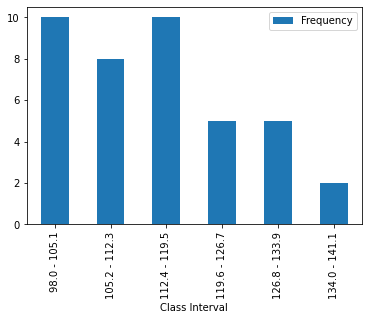

In [3]:
sets = [98, 99, 100, 100, 102, 103, 103, 104, 104, 105, 106, 106,
        108, 109, 109, 110, 111, 111, 113, 113, 114, 115, 117,
        117, 117, 118, 119, 119, 120, 121, 122, 125, 125, 127,
        128, 130, 130, 133, 134, 141]
frequency_distribution(sets)

count: 30
max: 33.7
min: 22.8
range: 10.9
Number of classes:  6
Class width: 1.82


,Class Interval,Frequency,Cumulative Frequency
0,22.8 - 24.61,3,3
1,24.62 - 26.43,2,5
2,26.44 - 28.25,8,13
3,28.26 - 30.07,9,22
4,30.08 - 31.89,5,27
5,31.9 - 33.71,3,30


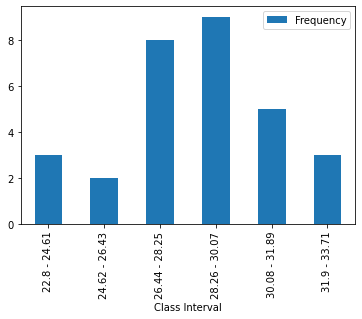

In [4]:
sets = [22.8, 26.2, 31.7, 31.1, 26.9, 28.0, 29.4, 28.8, 26.7, 
        27.4, 28.2, 30.3, 29.5, 28.9, 27.5, 28.3, 24.1, 25.3,
        28.5, 27.7, 24.4, 29.2, 30.3, 33.7, 27.5, 29.3, 30.2,
        28.5, 32.2, 33.7]
frequency_distribution(sets, comma=2)